In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# Load the expression data from the CSV file
# index_col=0 sets the first column (sample names) as the index
data = pd.read_csv("mainz_expression_data.csv", index_col=0)
X = data.values  # Convert to numpy array (200 samples, 22,283 genes)

In [5]:
# Standardize the data
# Each gene (column) is standardized to have mean 0 and variance 1 across samples
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained by PCA:", sum(pca.explained_variance_ratio_))

PCA Explained Variance Ratio: [0.07252924 0.0641156 ]
Total Variance Explained by PCA: 0.13664484361358778


In [6]:
# Apply SPCA with 2 components
# alpha controls sparsity; higher values increase sparsity
# random_state ensures reproducibility
spca = SparsePCA(n_components=2, alpha=1, random_state=0)
X_spca = spca.fit_transform(X_scaled)

# Compute sparsity of SPCA components
# Proportion of zero loadings in the components matrix
sparsity = np.mean(spca.components_ == 0)
print("SPCA Component Sparsity:", sparsity)


SPCA Component Sparsity: 0.22651797334290716


Text(0, 0.5, 'PC2')

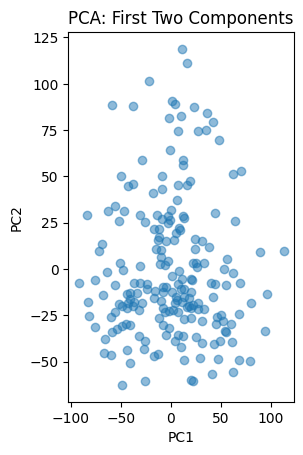

In [7]:
# PCA scatter plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("PCA: First Two Components")
plt.xlabel("PC1")
plt.ylabel("PC2")

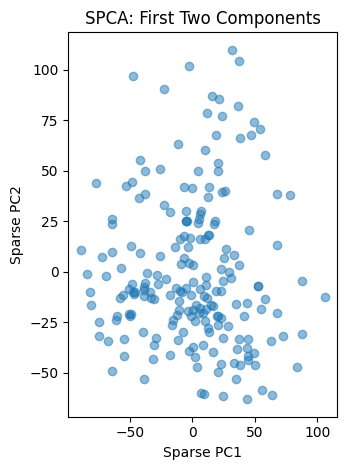

In [8]:
# SPCA scatter plot
plt.subplot(1, 2, 2)
plt.scatter(X_spca[:, 0], X_spca[:, 1], alpha=0.5)
plt.title("SPCA: First Two Components")
plt.xlabel("Sparse PC1")
plt.ylabel("Sparse PC2")

plt.tight_layout()
plt.show()

In [9]:
# Extract gene names from the DataFrame columns
gene_names = data.columns

# Top 10 genes contributing to PCA PC1
# Sort by absolute value of loadings in the first component
top_genes_pca = np.argsort(np.abs(pca.components_[0]))[::-1][:10]
print("\nTop 10 Genes in PCA PC1:")
for idx in top_genes_pca:
    print(f"{gene_names[idx]}: {pca.components_[0][idx]:.4f}")


Top 10 Genes in PCA PC1:
213332_at: 0.0205
220287_at: 0.0201
71933_at: 0.0200
221453_at: 0.0200
216081_at: 0.0200
215848_at: 0.0198
65635_at: 0.0194
220244_at: 0.0190
215366_at: 0.0190
58900_at: 0.0190


In [10]:
# Top 10 genes contributing to SPCA PC1
# Sort by absolute value; SPCA has many zeros, so top ones are non-zero
top_genes_spca = np.argsort(np.abs(spca.components_[0]))[::-1][:10]
print("\nTop 10 Genes in SPCA PC1:")
for idx in top_genes_spca:
    print(f"{gene_names[idx]}: {spca.components_[0][idx]:.4f}")


Top 10 Genes in SPCA PC1:
213332_at: 0.0244
71933_at: 0.0241
220287_at: 0.0237
216081_at: 0.0231
216678_at: 0.0229
58900_at: 0.0229
207960_at: 0.0228
221453_at: 0.0227
207936_x_at: 0.0226
215479_at: 0.0226


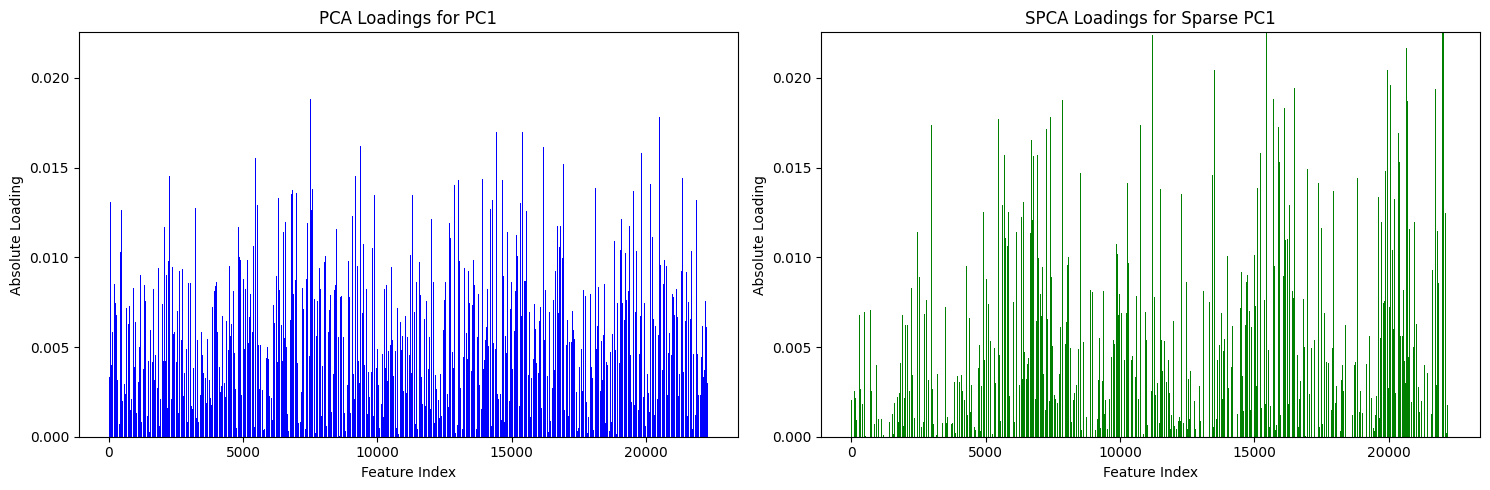

In [12]:
# Feature Loadings Visualization
plt.figure(figsize=(15, 5))

# PCA Loadings
plt.subplot(1, 2, 1)
plt.bar(range(len(pca.components_[0])), np.abs(pca.components_[0]), color='blue')
plt.title('PCA Loadings for PC1')
plt.xlabel('Feature Index')
plt.ylabel('Absolute Loading')
plt.ylim(0, max(np.abs(pca.components_[0])) * 1.1)

# SPCA Loadings
plt.subplot(1, 2, 2)
plt.bar(range(len(spca.components_[0])), np.abs(spca.components_[0]), color='green')
plt.title('SPCA Loadings for Sparse PC1')
plt.xlabel('Feature Index')
plt.ylabel('Absolute Loading')
plt.ylim(0, max(np.abs(pca.components_[0])) * 1.1)

plt.tight_layout()
plt.show()

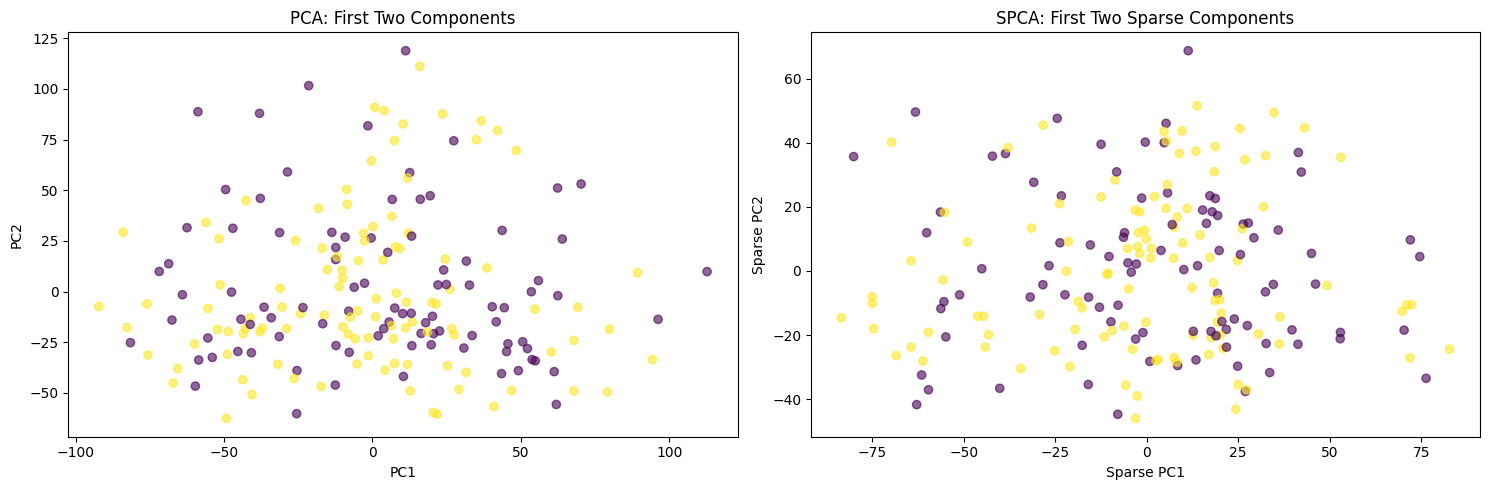

In [13]:
# Assuming a column 'label' exists in the dataset for group labels (e.g., subtypes)
labels = data['label'] if 'label' in data.columns else np.random.randint(0, 2, size=X.shape[0])  # Placeholder

# Scatter Plot
plt.figure(figsize=(15, 5))

# PCA Scatter
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('PCA: First Two Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

# SPCA Scatter
plt.subplot(1, 2, 2)
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('SPCA: First Two Sparse Components')
plt.xlabel('Sparse PC1')
plt.ylabel('Sparse PC2')

plt.tight_layout()
plt.show()

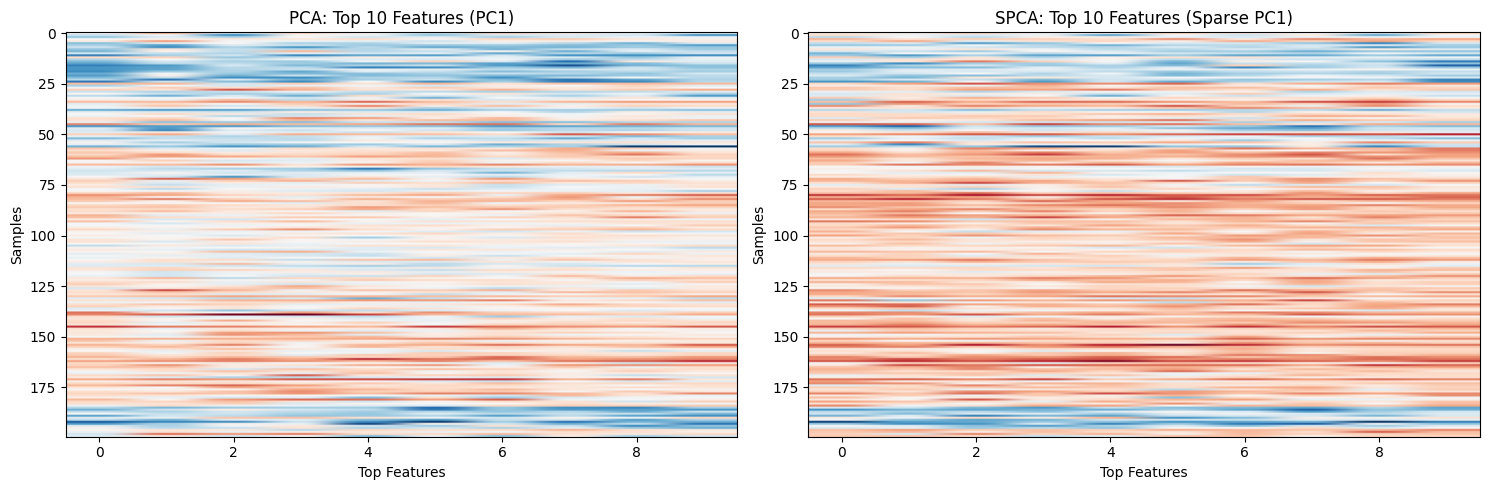

In [14]:
# Select top features (e.g., top 10 by absolute loading)
pca_top_idx = np.argsort(np.abs(pca.components_[0]))[-10:]
spca_top_idx = np.argsort(np.abs(spca.components_[0]))[-10:]

# Heatmaps
plt.figure(figsize=(15, 5))

# PCA Heatmap
plt.subplot(1, 2, 1)
plt.imshow(X_scaled[:, pca_top_idx], aspect='auto', cmap='RdBu_r')
plt.title('PCA: Top 10 Features (PC1)')
plt.xlabel('Top Features')
plt.ylabel('Samples')

# SPCA Heatmap
plt.subplot(1, 2, 2)
plt.imshow(X_scaled[:, spca_top_idx], aspect='auto', cmap='RdBu_r')
plt.title('SPCA: Top 10 Features (Sparse PC1)')
plt.xlabel('Top Features')
plt.ylabel('Samples')

plt.tight_layout()
plt.show()